In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import datetime

In [2]:
# Load Dataset
file_path = r"C:\Users\Хамида\Downloads\archive (3)\kc_house_data.csv"
df = pd.read_csv(file_path)

In [3]:
# Initial dataset information
print("Dataset Info:")
df.info()
print("\nDataset Summary:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float

In [4]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [5]:
# Convert date to datetime and extract year and month
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [6]:
# Feature Engineering: Age and Renovation Status
df['house_age'] = 2024 - df['yr_built']  # Assuming the current year is 2024
df['renovation_status'] = np.where(df['yr_renovated'] > 0, 1, 0)

In [7]:
# Drop unnecessary columns
df = df.drop(columns=['id', 'date', 'yr_built', 'yr_renovated'])


Correlation Matrix:


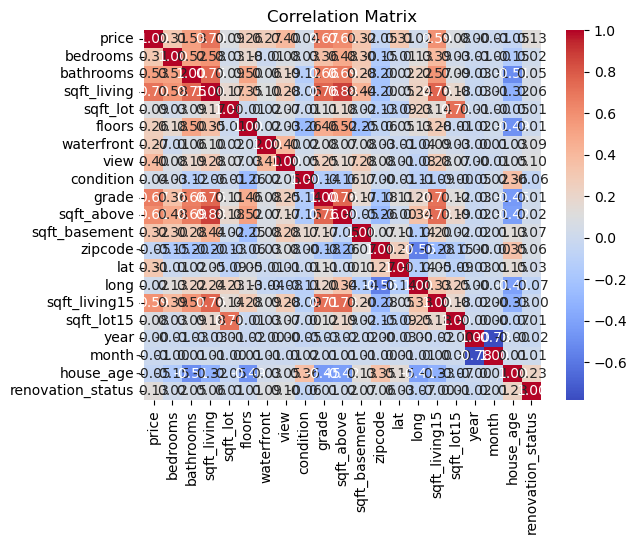

In [8]:
# Initial EDA
print("\nCorrelation Matrix:")
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

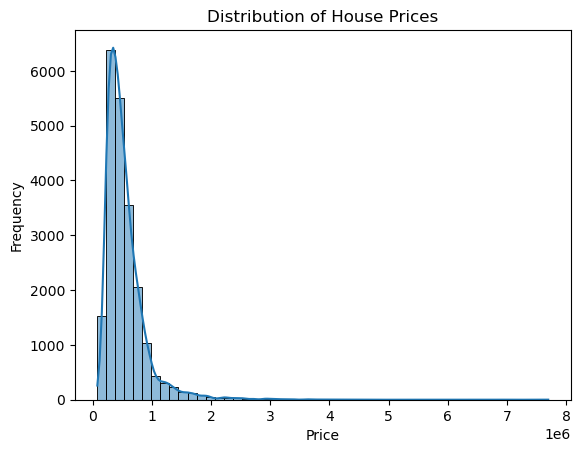

In [9]:
# Distribution of price
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

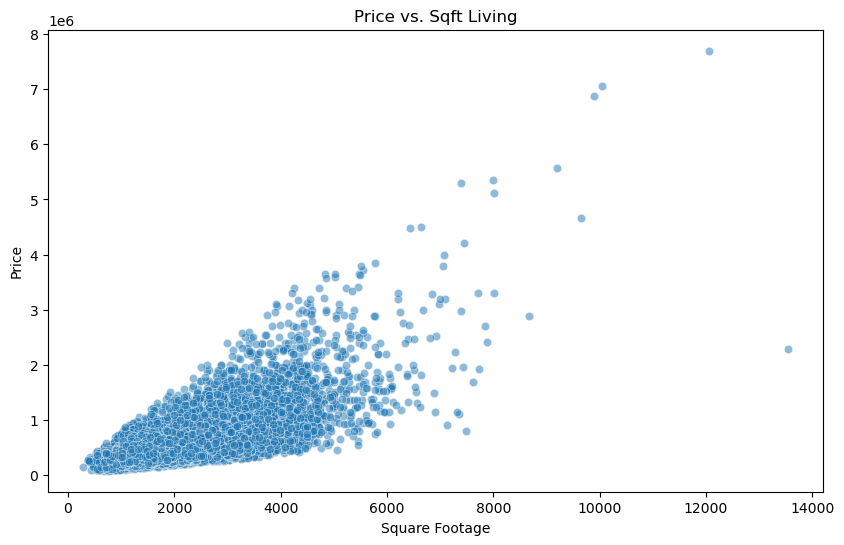

In [10]:
# Scatter plot: sqft_living vs price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=df, alpha=0.5)
plt.title("Price vs. Sqft Living")
plt.xlabel("Square Footage")
plt.ylabel("Price")
plt.show()

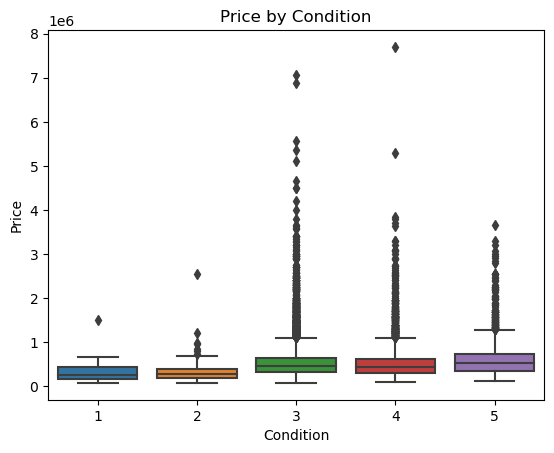

In [11]:
# Boxplot for price by condition
sns.boxplot(x='condition', y='price', data=df)
plt.title("Price by Condition")
plt.xlabel("Condition")
plt.ylabel("Price")
plt.show()

In [12]:
# Data split
X = df.drop(columns=['price'])
y = df['price']

In [13]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Model 1: Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [15]:
# Predictions and Evaluation for Linear Regression
y_pred_linear = linear_model.predict(X_test)
print("\nLinear Regression Metrics:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_linear)))
print("R2 Score:", r2_score(y_test, y_pred_linear))


Linear Regression Metrics:
RMSE: 212041.11334486646
R2 Score: 0.7025902132853714


In [16]:
# Model 2: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [17]:
# Predictions and Evaluation for Random Forest
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Metrics:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2 Score:", r2_score(y_test, y_pred_rf))


Random Forest Metrics:
RMSE: 149065.48581112918
R2 Score: 0.8530162567475723


In [18]:
# Feature Importance Plot for Random Forest
importances = rf_model.feature_importances_
features = X.columns
sorted_indices = np.argsort(importances)[::-1]

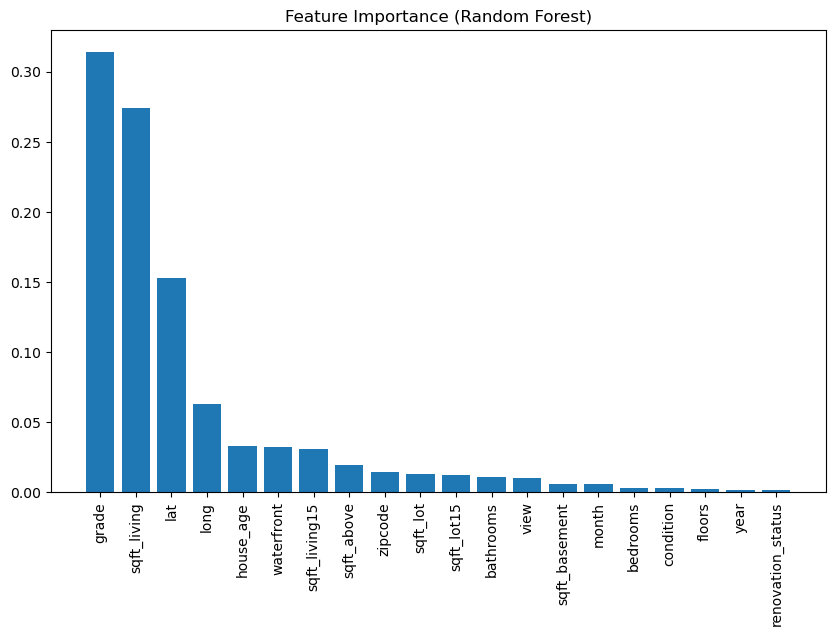

In [19]:
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[sorted_indices], align="center")
plt.xticks(range(X.shape[1]), features[sorted_indices], rotation=90)
plt.title("Feature Importance (Random Forest)")
plt.show()

### Observations

The dataset contains 21 columns and 21,613 rows of data. The dataset includes information such as prices, dimensions (living area, lot size, floors, condition, grade), number of bedrooms and bathrooms. Locations (latitude, longitude, zipcodes). Also sale data, and advanced metrics like sqft_above, sqft_basement, yr_built, yr_renovated, waterfront. The target variable is price (sale price of houses). No missing values are found in the dataset.

Numerical: most columns (e.g., price, bedrooms, bathrooms, sqft_living, etc.) are numerical, making it well-suited for statistical and machine learning analysis. Price ranges from 75,000 USD to 7.7M USD, indicating significant variability influenced by factors such as location, size, and other features.

Categorical: the waterfront column is binary (0 or 1), indicating whether a property is waterfront. Zipcode is categorical, representing the location of the property. It could strongly influence property prices.

* The date column is stored as an object. It is converted into a datetime format for trend analysis (price changing over the time).

1.bedrooms: ranges from 0 to 33, where extreme values 33 bedrooms could be outliers.
2.sqft_living: maximum value of 13,540 suggests large properties, while the minimum of 290 indicates small houses.
3.yr_built and yr_renovated: useful for age analysis of the property. Most properties are older homes with occasional renovations.

Geodata: latitude (lat) and longitude (long) are available for visualization.

### Observations
The Correlation Matrix:

1. sqft_living (living area size) shows a strong positive correlation with house prices. Larger living spaces generally result in higher house prices.
2. sqft_lot (lot size) is positively correlated, indicating that properties with larger lots tend to have higher prices.
3. A higher grade of a property, which reflects the quality of construction and finishes, correlates strongly with higher prices.
4. Homes in better condition (newer or better-maintained) also show a positive relationship with price.
5. The location of the home, as indicated by the zipcode, plays a significant role in determining the price. Certain zipcodes are associated with higher-value properties. Homes with waterfront views or access are typically more expensive. Latitude and Longitude (lat, long) provide geographical context, capturing regional trends in pricing.
6. sqft_basement and sqft_above: square footage of the basement and the portion of the home above ground contribute positively to the price. year built and year renovated for newer homes or those recently renovated fetch higher prices.

### Visualizations
1. Distribution of House Prices: Most homes are in the lower-to-mid price range. Outliers in the high price range.
2. Price vs. Square Living Area: there is a positive correlation between the square footage of living space and the price of the home. Larger homes tend to have higher prices.
3. Price by Condition: homes in better condition have higher prices. The quality of a home (condition) affects its price. Homes that are in excellent condition command the highest prices.

### Observations
Performance Evaluation

Linear Regression: RMSE $212,041
R² Score: 0.703

Random Forest: RMSE $149,065
R² Score: 0.853

Random Forest performs better than Linear Regression in terms of both RMSE (Root Mean Squared Error) and R² score. 
Linear Regression explains about 70.3 percents of the variance in the house prices, leaving 29.7 percents of the variability unexpected. Random Forest explains 85.3 percents of the variance in the house prices. Random Forest offers a more accurate prediction with a lower RMSE and higher R² score. 

### Observations
Feature Importance in Random Forest indicates the contribution of each feature to the model's prediction accuracy. Features like sqft_living, sqft_lot, condition, grade, and zipcode have high importance in predicting house prices. Features with little impact, such as view or yr_built, have lower importance. 

In [20]:
import folium

# Create a map centered around the mean latitude and longitude
m = folium.Map(location=[df['lat'].mean(), df['long'].mean()], zoom_start=12)

# Add markers for each house in the dataset
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['long']],
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(m)

# Display the map
m.save('house_prices_map.html')

### Observations
The interactive map with markers represents house prices. Prices tend to be higher in certain areas, especially in proximity to lakes and popular neighborhoods. A cluster of high-priced houses is seen in urban or waterfront areas. House prices change over time significantly. Price fluctuations over time may be due to market conditions, seasons, economic factors. Also higher prices are usually during summer season. Changes in prices could also be tied to macroeconomic events (e.g., financial crises, pandemics).